<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Colab" data-toc-modified-id="Colab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Colab</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading" data-toc-modified-id="Loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading</a></span><ul class="toc-item"><li><span><a href="#extra-one-hot-features" data-toc-modified-id="extra-one-hot-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>extra one-hot features</a></span></li><li><span><a href="#extra-keywords" data-toc-modified-id="extra-keywords-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>extra keywords</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>BERT</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TextCNN" data-toc-modified-id="TextCNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TextCNN</a></span><ul class="toc-item"><li><span><a href="#notes:" data-toc-modified-id="notes:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>notes:</a></span></li></ul></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LSTM</a></span></li></ul></div>

# Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Text-Classification/code")
!pip install pyLDAvis
!pip install gensim
!pip install pandas==1.3.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import 

In [2]:
from classification_utils import *
from clustering_utils import *
from eda_utils import *
from nn_utils_keras import *
from feature_engineering_utils import *
from data_utils import *
import warnings 
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Loading

In [3]:
train, test = load_data(only_stem_voc=False, sample50=False)
# train, upsampling_info = upsampling_train(train)
# train_text, train_label = train_augmentation(train, select_comb=[['reply', 'reference_one', 'reference_two']])
train_text, train_label = train_augmentation(train, select_comb=[['From', 'contained_emails', 'Organization', 'Subject', 'reply', 'reference_one', 'reference_two']])
# train_text, train_label = train['text'], train['label']
test_text, test_label = test['text'], test['label']
# test_text, test_label = test[['reply', 'reference_one', 'reference_two']].apply(lambda x: " ".join(x), axis=1), test['label']


# test_text = test_text.apply(lambda x: extract_stem_voc(x))
# train_text = train_text.apply(lambda x: extract_stem_voc(x))
# train_text.to_csv("stem_voc_train.csv")
# test_text.to_csv("stem_voc_test.csv")

# train_text, test_text = load_stem_voc()
train_text.sample(5).tolist()


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']
combination 1 train:  ['From', 'contained_emails', 'Organization', 'Subject', 'reply', 'reference_one', 'reference_two']


['critus@cwis.unomaha.edu (Michael J. Abboud)  University of Nebraska at Omaha\n  When we speak of the Bible and its apparant contradictions, we would do well to remember the context in\n  If we are to accept this line of reason, remembering that it does not\n  As my study of the Christian Religion has progressed over the years, I have\n  It matters little to me, as a concession in either serves my purpose Re: *** The list of Biblical contradictions critus  ',
 'cosmo@pro-angmar.alfalfa.com (Frank Benson)  cosmo@pro-angmar   cosmo@pro-angmar.alfalfa.com  UTexas Mail-to-News Gateway Argic You definetly are in need of a shrink, loser! --- ProLine: Internet: UUCP: uunet!bu.edu!alphalpha!pro-angmar!cosmo  ',
 'c5ff@jupiter.sun.csd.unb.ca (COOK  Charlie)  University of New Brunswick NHL Summary parse results for games played Mon, April 5, 1993 Hartford 1 1 3--5 NY Rangers 1 2 1--4 First period 1, Hartford, Cunneyworth 5 12:21. 2, NY Rangers, Graves 34 18:39. Second period 3, NY Rangers, Kov

In [4]:
####################################
### label mapper
####################################
labels = sorted(train_label.unique())
label_mapper = dict(zip(labels, range(len(labels))))
train_label = train_label.map(label_mapper)
test_label = test_label.map(label_mapper)
y_train = train_label
y_test = test_label

print(train_text.shape)
print(test_text.shape)
print(train_label.shape)
print(test_label.shape)
print(labels)

(11083,)
(7761,)
(11083,)
(7761,)
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


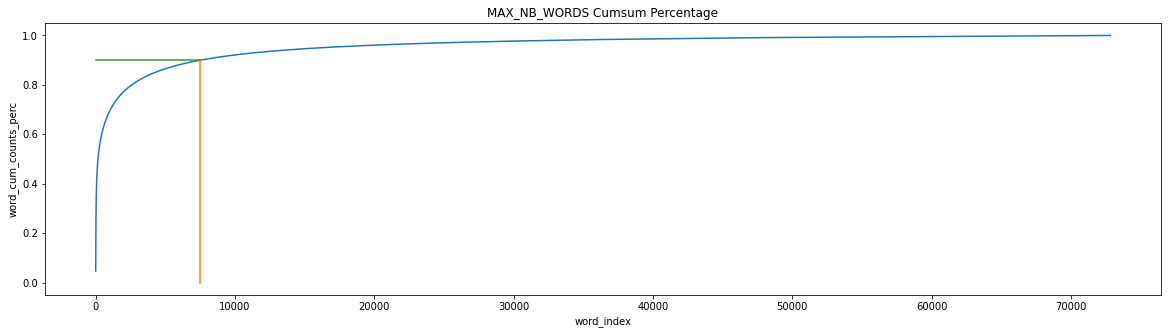

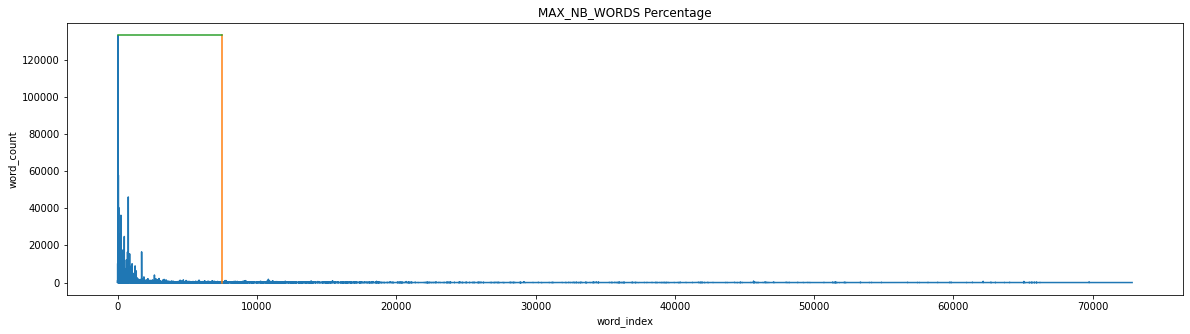

Cut index with 90.0 % of corpus:  7512 

    index  word   count
0      39   the  133032
1      43    to   67167
2      22    of   63213
3      56     a   57824
4      33   and   53004
5     768     i   46073
6      75    is   40454
7      40    in   39034
8     239  that   36229
9      54    it   30959
10     93   for   25881
11    482   you   24794
12     62    on   18585
13    257  this   18338
14     55     s   17902
15    405    be   17664
16     37   are   17262
17    769  have   16660
18   1725   edu   16519
19    712   not   16482


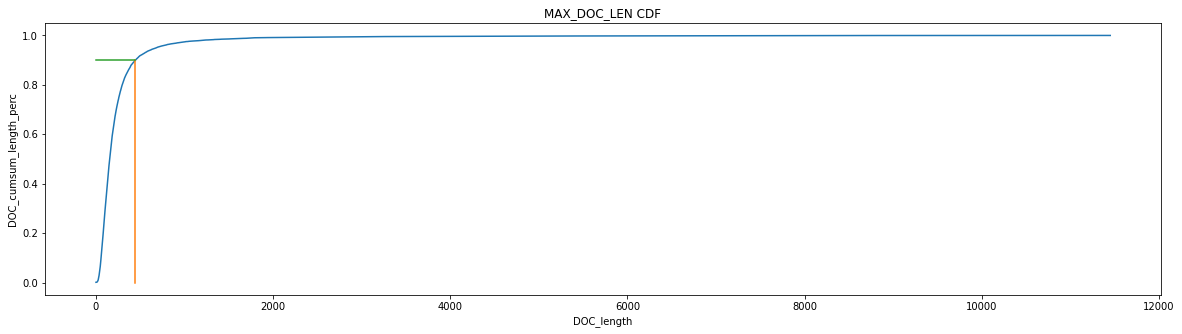

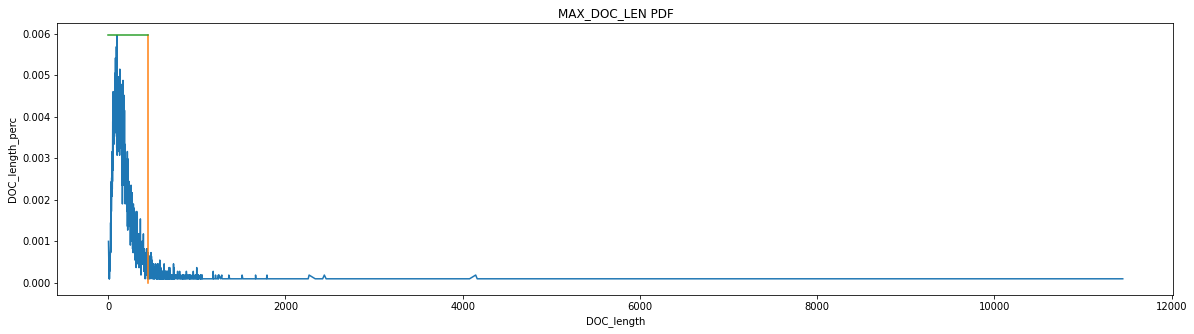

Cut index with 90.0 % of corpus:  449


In [5]:
####################################
### hyper params 
####################################
filters = '"#$%&()*+,-/:;<=>@[\\]^_`{|}~\t\n0123465789!.?\''
MAX_NB_WORDS_ratio = 0.90
MAX_DOC_LEN_ratio = 0.90
MAX_NB_WORDS = eda_MAX_NB_WORDS(train_text, ratio=MAX_NB_WORDS_ratio, char_level=False, filters=filters)
MAX_DOC_LEN = eda_MAX_DOC_LEN(train_text, ratio=MAX_DOC_LEN_ratio, char_level=False, filters=filters)

In [6]:
# X_train, X_test, word_to_idx, tfidf_vect = tfidf_vectorizer(train_text, test_text, stop_words=True, binary=True, min_df=5)
# X_train, transform_mapper = dimension_reduction(X_train, out_dim=1000) # not allow negative 
# X_test = transform_mapper.transform(X_test)

## extra one-hot features

In [7]:
# one_hot_X_train, one_hot_X_test, one_hot_word_to_idx, one_hot_count_vect = count_vectorizer(
#     train['Subject']+" " + train['Organization'], test['Subject']+" " + test['Organization'], stop_words=True, binary=False, min_df=3, max_df=0.001)

## extra keywords

In [8]:
# label_docs = train.groupby('label')['text'].apply(lambda x: " ".join(x)) # 要去除标点符号
# dtm, _, label_word_to_idx, _ = count_vectorizer(label_docs, [''], stop_words=True, min_df=1, binary=True)
# label_idx_to_word = dict([val, key] for key, val in label_word_to_idx.items())
# keywords_threshold = 1
# keywords_idx = np.where(dtm.sum(axis=0)<=keywords_threshold)[0]
# print(" keywords_idx shape: ")
# voc = [label_idx_to_word[idx] for idx in keywords_idx]

# keywords_X_train, keywords_X_test, keywords_word_to_idx, keywords_count_vect = count_vectorizer(
#     train['text'], test['text'], voc=voc, stop_words=True, min_df=1, binary=True)

In [9]:
# _X_train = np.hstack([X_train])
# _X_test = np.hstack([X_test])
# _X_train = np.hstack([X_train, one_hot_X_train, keywords_X_train])
# _X_test = np.hstack([X_test, one_hot_X_test, keywords_X_test])

# BERT

In [10]:
!pip install transformers
!pip install torchinfo
import torch
import torch.nn.functional as F

from torchinfo import summary
from transformers import BertTokenizer, BertModel, AdamW, BertConfig, get_linear_schedule_with_warmup, BertForSequenceClassification

from bert_utils.training_utils import extract_contextual_embedding, train_multi_label_model, model_eval
from bert_utils.data_loader import  data_loader_BERT
from bert_utils import glovar 
from bert_utils.model import *




Append path:  /content/drive/MyDrive/Text-Classification/code/bert_utils
My Linux system:  Linux
using:  cuda
My Linux system:  Linux
using:  cuda


In [11]:
train_one_hot_labels = F.one_hot(torch.tensor(y_train.values))
test_one_hot_labels = F.one_hot(torch.tensor(test_label.values))

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained("bert-base-uncased", output_attentions = True, output_hidden_states = True)
# bert_model = BertForSequenceClassification.from_pretrained( "bert-base-uncased", num_labels=20, output_attentions=True, output_hidden_states=True,)
# global device
device = glovar.device_type
bert_model = bert_model.to(device)
print(next(bert_model.parameters()).device)  # 输出：cpu
summary(bert_model)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda:0


Layer (type:depth-idx)                             Param #
BertModel                                          --
├─BertEmbeddings: 1-1                              --
│    └─Embedding: 2-1                              23,440,896
│    └─Embedding: 2-2                              393,216
│    └─Embedding: 2-3                              1,536
│    └─LayerNorm: 2-4                              1,536
│    └─Dropout: 2-5                                --
├─BertEncoder: 1-2                                 --
│    └─ModuleList: 2-6                             --
│    │    └─BertLayer: 3-1                         7,087,872
│    │    └─BertLayer: 3-2                         7,087,872
│    │    └─BertLayer: 3-3                         7,087,872
│    │    └─BertLayer: 3-4                         7,087,872
│    │    └─BertLayer: 3-5                         7,087,872
│    │    └─BertLayer: 3-6                         7,087,872
│    │    └─BertLayer: 3-7                         7,087,872
│    │   

In [13]:
load_embed= False
finetune = True

learning_rate = 0.0001
epochs = 5
patience = 60
MAX_DOC_LEN = 300
batch_size=32


max_len = min(512, MAX_DOC_LEN)
label_size = 20
label_cols = labels
embed_dim = 768
hidden_units = 64
num_filters = 30
kernel_sizes = [1,2,3]
embed_type=3

In [14]:
if load_embed is True:
    train_sentences_encoding = np.load(f'train_sentences_encoding_{finetune}_{embed_type}.npy')# , mmap_mode='r')
    train_input_ids = np.load(f'train_input_ids_{finetune}_{embed_type}.npy')#, mmap_mode='r')
    train_sentences_encoding = torch.tensor(train_sentences_encoding)
    train_input_ids = torch.tensor(train_input_ids)
else:
    train_input_ids, train_sentences_encoding, train_attention_masks = extract_contextual_embedding(train_text, tokenizer, bert_model, finetune=finetune, max_len = max_len, low_RAM_inner_batch=True, embed_type=embed_type)
    # train_input_ids, train_sentences_encoding = extract_contextual_embedding(train_text.iloc[1:3], tokenizer, bert_model, max_len = max_len, low_RAM_inner_batch=False) test
    np.save(f'train_sentences_encoding_{finetune}_{embed_type}.npy', train_sentences_encoding)
    np.save(f'train_input_ids_{finetune}_{embed_type}.npy', train_input_ids)

## for finetune version train_sentences_encoding is the attention mask
dataloader, validation_dataloader = data_loader_BERT(train_sentences_encoding, train_input_ids, train_attention_masks, train_one_hot_labels, 
                                                                                            batch_size, random_state=1234, test_size=0.1)
del train_sentences_encoding, train_input_ids

In [15]:

model_path = 'bert_clf.pt'
label_size = len(labels)


if finetune:
    model = clf_finetuneBERT(freeze_bert=False, num_classes=label_size)
    # dataloader 会不一样
else:    
    # model = lstm_cnn_o1(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
    # model = lstm_cnn_o2(embed_dim, max_len, hidden_units, num_filters, kernel_sizes, label_size)
    # model = clf(embed_dim, max_len, hidden_units, label_size)
    model = clf_naive(embed_dim, max_len, hidden_units, label_size, dropout_rate=0.0)    

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


clf_finetuneBERT(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [16]:
[torch.cuda.empty_cache() for _ in range(10) ]
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |     837 MB |     837 MB |     837 MB |       0 B  |
|       from large pool |     836 MB |     836 MB |     836 MB |       0 B  |
|       from small pool |       1 MB |       1 MB |       1 MB |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |     837 MB |     837 MB |     837 MB |       0 B  |
|       from large pool |     836 MB |     836 MB |     836 MB |

In [ ]:
# Data Loader

optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
total_steps = len(dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(total_steps * 0.1), num_training_steps=total_steps)


model, training_stats, pred_labels, true_labels = train_multi_label_model(model, label_size, label_cols, dataloader, validation_dataloader, finetune=finetune, optimizer=optimizer, scheduler=scheduler, epochs=epochs, patience=patience, model_path=model_path)


pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats.to_csv(model_path[0:-2] + 'csv')

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(df_stats['train_loss'], 'b-o', label="Training")
plt.plot(df_stats['val_loss'], 'g-o', label="Validation")
plt.legend()
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(list(range(1, epochs + 1)))
plt.show()

cuda

======== Epoch 1 / 5 ========
Training...
    Epoch 1	 Train Loss: 2.4691	 Train Acc: 0.6163	 Train F1: 0.5560	 Train ovr AUC: 0.8351	 Train precision: 0.6235	 Train recall: 0.5992
    Epoch 1	 Val Loss: 2.4898	 Val Acc: 0.5924	 Val F1: 0.5359	 Val ovr AUC: 0.8212	 Val precision: 0.5692	 Val recall: 0.5744
model saved

======== Epoch 2 / 5 ========
Training...


In [ ]:
# model.load_state_dict(torch.load(model_path))
[torch.cuda.empty_cache() for _ in range(10) ]
print(torch.cuda.memory_summary())

In [ ]:
if load_embed is True:
    
    test_sentences_encoding = np.load(f'test_sentences_encoding_{finetune}_{embed_type}.npy')#, mmap_mode='r')
    test_input_ids = np.load(f'test_input_ids_{finetune}_{embed_type}.npy') # , mmap_mode='r')
    test_sentences_encoding = torch.tensor(test_sentences_encoding)
    test_input_ids = torch.tensor(test_input_ids)
else:
    test_input_ids, test_sentences_encoding, test_attention_masks = extract_contextual_embedding(test_text, tokenizer, bert_model, finetune=finetune, max_len = max_len, low_RAM_inner_batch=True, embed_type=embed_type)
    np.save(f'test_sentences_encoding_{finetune}_{embed_type}.npy', test_sentences_encoding)
    np.save(f'test_input_ids_{finetune}_{embed_type}.npy', test_input_ids)


test_dataloader, _ = data_loader_BERT(test_sentences_encoding,test_input_ids, test_attention_masks, test_one_hot_labels, batch_size=batch_size, testing=True)
del test_sentences_encoding, test_input_ids

tokenized_texts, pred_labels, true_labels, avg_val_loss, auc_score, precison, recall, acc, f1 = model_eval(model, test_dataloader,  labels , finetune=finetune, class_weight=None)
classification_report = evaluation_report(np.argmax(true_labels, axis=1),  np.argmax(pred_labels, axis=1), labels=labels)
roc_auc(y_test, pred_labels)

In [ ]:
import re
from collections import Counter
import pandas as pd
import torch
from sklearn.model_selection import train_test_split  # , StratifiedKFold
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import numpy as np


In [ ]:
df_stats